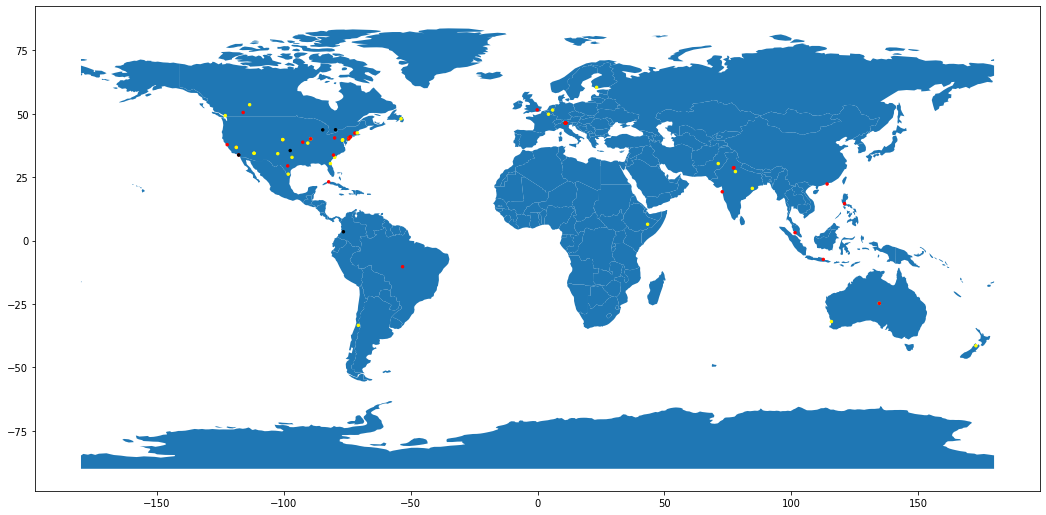

In [3]:
import pandas as pd
import numpy as np
import itertools
from textblob import TextBlob

import matplotlib.pyplot as plt
from shapely.geometry import Point
from  geopy.geocoders import Nominatim
import geopandas as gpd
from geopandas import GeoDataFrame


geolocator = Nominatim(user_agent="BRJ")
#print (loc.latitude, loc.longitude)

df = pd.read_csv('E:/Software/Anaconda/corona_tweets_92/coronatweets_OUT.csv', usecols = ['text','user_location'])


dsLoc = []

# LIMIT = len(df)
LIMIT = 1000
for row in itertools.islice(df.itertuples(), LIMIT):
    loc=geolocator.geocode(row[2])
    #polarity = TextBlob(row[18]).sentiment.polarity
    #colour = 'Red' if TextBlob(row[18]).sentiment.polarity > 0 else 'Yellow' if TextBlob(row[18]).sentiment.polarity < 0 else 'Black'
    if loc is not None:
        polarity = TextBlob(row[1]).sentiment.polarity
        colour = 'Red' if polarity > 0 else 'Black' if polarity < 0 else 'Yellow'
        dsLoc.append([loc.longitude,loc.latitude,polarity,colour])
dfLatLongColor = pd.DataFrame(dsLoc, columns = ['Longitude', 'Latitude','Polarity','Colour']) 
geometry = [Point(xy) for xy in zip(dfLatLongColor['Longitude'], dfLatLongColor['Latitude'])]

# geometry = Point(loc.latitude,loc.longitude)
gdf = GeoDataFrame(dfLatLongColor, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(18, 12)), marker='o', color=gdf.Colour, markersize=6);